In [1]:
 %%javascript
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });

<IPython.core.display.Javascript object>

## QCD InfraRed Extension Code

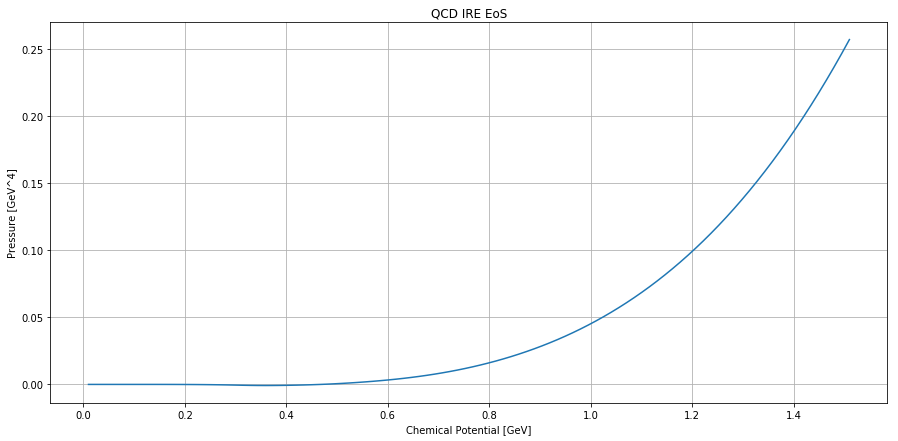

In [7]:
%matplotlib inline

import math
import cmath
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt
import matplotlib as mpl
#from scipy import integrate


Nc = 3
Nf = 2
M3 = 0.196
m2 = 0.639
MPrime = 0.014


def _infunc(x,func,gfun,hfun,more_args):
    a = gfun(x)
    b = hfun(x)
    myargs = (x,) + more_args
    return integ.quad(func,a,b,args=myargs)[0]

def custom_dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-8, 
                   epsrel=1.49e-8, maxp1=50, limit=50):
    return integ.quad(_infunc, a, b, (func, gfun, hfun, args), 
                          epsabs=epsabs, epsrel=epsrel, maxp1=maxp1, limit=limit)

def Omega2(zeta, p, m2):
    return p**2. + (m2 + M3/(-zeta + p**2. + m2))**2.

def integrandTheta(theta, p, mu, mp):
    
    return 1./(2.*math.pi)**3.*(4.*math.pi)* p**2.* \
        (2.*Nc*Nf*(1./2./math.pi)*(2.)* \
             math.log(
                 abs(
                     (Omega2((1j*theta + mu)**2., p, mp) - (1j*theta + mu)**2.)/
                     (Omega2(-theta**2., p,  mp) + theta**2.)                      
                 )
             )
        )


def pressureZeroT(mu, mp):
    def lim_inf_theta(p):
        return 0.

    def lim_sup_theta(p):
        return np.inf

    #pressure_zero_t, err_dblquad = integ.dblquad(integrandTheta, 0, mu, lim_inf_theta, lim_sup_theta, args=(mu, mp))
    pressure_zero_t, err_dblquad = custom_dblquad(integrandTheta, 0, mu, lim_inf_theta, lim_sup_theta, args=(mu, mp), maxp1=80, limit=80)
    return pressure_zero_t
    
    

# Cálculo da pressão desde mu=0.01GeV até mu=1.5GeV    
mu_range = np.linspace(0.01, 1.51, 100)

pressure_zero_T_list = []    

for mu in mu_range:
    pressure = pressureZeroT(mu, MPrime)
    
    # pressure_zero_T_list.append([mu, pressure])
    pressure_zero_T_list.append(pressure)

#print pressure_zero_T_list

mpl.rcParams['figure.figsize'] = (15,7)
plt.figure()
plt.plot(mu_range, pressure_zero_T_list)
plt.xlabel('Chemical Potential [GeV]')
plt.ylabel('Pressure [GeV^4]')
plt.title('QCD IRE EoS')
plt.grid()
plt.show()